In [1]:
import numpy as np #    
import matplotlib
import tkinter

import pylab # модуль для построения графиков
import matplotlib.pyplot as plt #                                                              +                        
import cv2
import ipywidgets as widgets
from PIL import ImageEnhance
from PIL import Image # отрисовка изображений

from skimage import io, color
from skimage import util
import matplotlib.pyplot as plt
from IPython.display import display

import tifffile
import matplotlib.image as mpimg

In [2]:
import matplotlib.image as mpimg 
import os
from tensorflow.keras.preprocessing import image

In [3]:
import pydicom
from skimage.transform import rotate

<h1 style="color:Purple;">Арки Gilula</h1>

<h3 style="color:Navy;">1.1 Эталонное исходное изображение (норма)</h3>

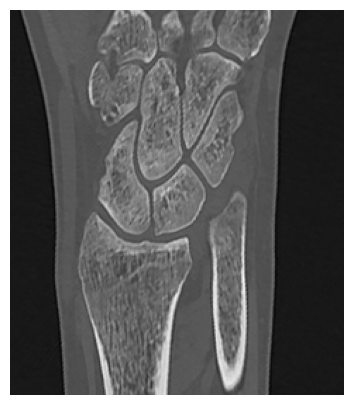

In [4]:
plt.figure(figsize=(5, 5)) # Отображение изображения в оттенках серого
image = Image.open('16_262_152_bw.tiff')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

<h3 style="color:Navy;">1.2 Эталонное исходное изображение (норма) с отметкой ширины запястья</h3>

In [5]:
imagett = tifffile.imread('16_262_152_bw.tiff')
# Нормализация изображение
image_norm = (imagett - imagett.min()) / (imagett.max() - imagett.min())
image_norm = (image_norm * 255).astype(np.uint8)
plt.imsave("16_262_152_bw.png", image_norm)

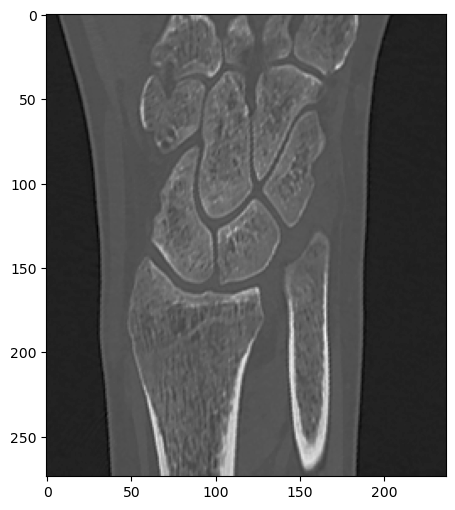

In [6]:
%matplotlib inline
#gray_image152 = mpimg.imread('152_for_line.png')
gray_image152 = Image.open('16_262_152_bw.png')

# Преобразование изображения в черно-белый формат
gray_image152 = gray_image152.convert("L")
plt.figure(figsize=(6, 6)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
#plt.axis('off')
plt.show()

In [7]:
import matplotlib
matplotlib.use('TkAgg')  # Используйте TkAgg backend
import matplotlib.pyplot as plt
import numpy as np

# 1) Загрузка изображения
image_path = "16_262_152_bw.png"  # Замените на путь к вашему изображению
image = plt.imread(image_path)

# Отображение изображения на экране во всплывающем окне
fig, ax = plt.subplots()
ax.imshow(image)

# 2) Пометка двух точек на изображении
points = []

def onclick(event):
    if len(points) < 2:
        x, y = event.xdata, event.ydata
        ax.plot(x, y, 'ro', markersize=3)  # Пометка точки красным кругом и установка размера точки
        points.append((x, y))
        if len(points) == 2:
            # 3) Определение расстояния между помеченными точками в миллиметрах
            pixel_distance = 1  # Расстояние в миллиметрах для одного пикселя (замените это значение при необходимости)
            x_distance = abs(points[1][0] - points[0][0]) * pixel_distance
            y_distance = abs(points[1][1] - points[0][1]) * pixel_distance
            distance = np.sqrt(x_distance**2 + y_distance**2)
            
            # 4) Нанесение значения расстояния по координатам 60,40
            ax.text(25, 25, f"Distance: {distance:.2f} mm", color='white', fontsize=12)
            plt.draw()

cid = fig.canvas.mpl_connect("button_press_event", onclick)

# Ожидание двух кликов мыши
plt.waitforbuttonpress()
plt.waitforbuttonpress()

# 5) Сохранение изображения без прозрачности
output_path = "16_262_152_bw_width.png"  # Замените на путь для сохранения изображения
plt.savefig(output_path, transparent=False)

# 6) Закрытие изображения
plt.close()

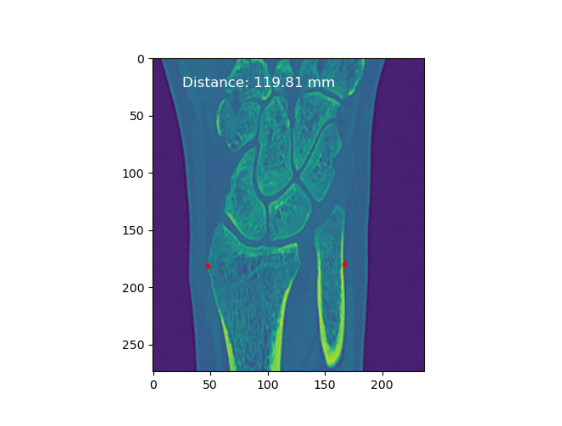

In [9]:
plt.figure(figsize=(7, 7))
%matplotlib inline
gray_image542 = Image.open('16_262_152_bw_width.png')

# Преобразование изображения в черно-белый формат
gray_image152 = gray_image152.convert("L")

plt.imshow(gray_image542, cmap='gray') #
plt.axis('off')  # Выключить оси графика + УБРАТЬ ДОПОЛНИТЕЛЬНУЮ РАМКУ = РАБОТАЮТ ПАРОЙ
plt.show()

<h3 style="color:Navy;">1.3 На эталонном исходном изображении (норме) определение ширины суставной щели</h3>

In [10]:
import matplotlib
matplotlib.use('TkAgg')  # Используйте TkAgg backend
import matplotlib.pyplot as plt
import numpy as np

# 1) Загрузка изображения
image_path = "16_262_152_bw.png"  # Замените на путь к вашему изображению
image = plt.imread(image_path)

# Отображение изображения на экране во всплывающем окне
fig, ax = plt.subplots()
ax.imshow(image)

# 2) Пометка двух точек на изображении
points = []

def onclick(event):
    if len(points) < 2:
        x, y = event.xdata, event.ydata
        ax.plot(x, y, 'ro', markersize=3)  # Пометка точки красным кругом и установка размера точки
        points.append((x, y))
        if len(points) == 2:
            # 3) Определение расстояния между помеченными точками в миллиметрах
            pixel_distance = 0.4  # Расстояние в миллиметрах для одного пикселя (замените это значение при необходимости)
            x_distance = abs(points[1][0] - points[0][0]) * pixel_distance
            y_distance = abs(points[1][1] - points[0][1]) * pixel_distance
            distance = np.sqrt(x_distance**2 + y_distance**2)
            
            # 4) Нанесение значения расстояния по координатам 60,40
            ax.text(25, 25, f"Distance: {distance:.2f} mm", color='white', fontsize=12)
            plt.draw()

cid = fig.canvas.mpl_connect("button_press_event", onclick)

# Ожидание двух кликов мыши
plt.waitforbuttonpress()
plt.waitforbuttonpress()

# 5) Сохранение изображения без прозрачности
output_path = "16_262_152_bw_articular_gap.png"  # Замените на путь для сохранения изображения
plt.savefig(output_path, transparent=False)

# 6) Закрытие изображения
plt.close()

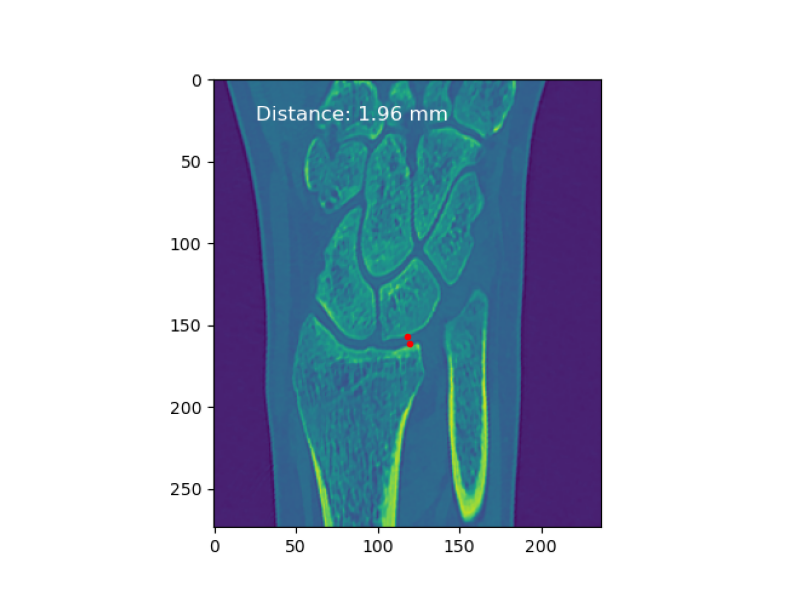

In [11]:
plt.figure(figsize=(10, 10))
%matplotlib inline
gray_image542 = Image.open('16_262_152_bw_articular_gap.png')

# Преобразование изображения в черно-белый формат
gray_image152 = gray_image152.convert("L")

plt.imshow(gray_image542, cmap='gray') #
plt.axis('off')  # Выключить оси графика + УБРАТЬ ДОПОЛНИТЕЛЬНУЮ РАМКУ = РАБОТАЮТ ПАРОЙ
plt.show()

<h2 style="color:red;">ЗАМКНУТАЯ ЛИНИЯ</h2>

<h3 style="color:Navy;">2.1 определить 1-ю арку Gilula в отдельный файл + эталонное изображение с линией</h3>

In [4]:
matplotlib.use('TkAgg')  # Используйте TkAgg backend
# Специальная магическая команда для интерактивных графиков в Jupyter Notebook
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from PIL import Image, ImageDraw
import numpy as np
from scipy.interpolate import splprep, splev

image_path = '16_262_152_bw_width.png'  #  путь к  изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=1)
        fig.canvas.draw()
        
        # Когда было выбрано 6 точек, нарисовать кривую линию
        if len(points) == 31:
            line_image = draw_spline(points)
            save_combined_image(line_image)
            save_line_image(line_image)
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=0.3)  # Рисование непрозрачной линии
    fig.canvas.draw()
    
    # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("standard_and_first_line.png")
    print("Изображение сохранено как standard_and_first_line.png")

# Функция для сохранения только линии в отдельный файл
def save_line_image(line_image):
    line_image.save("first_line_only.png")
    print("Изображение линии сохранено как first_line_only.png")

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как standard_and_first_line.png
Изображение линии сохранено как first_line_only.png


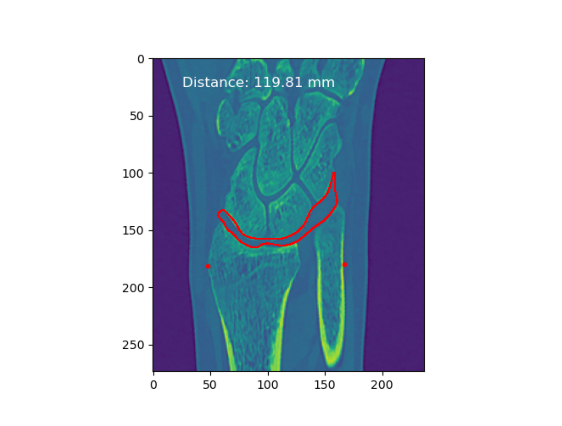

In [5]:
%matplotlib inline
gray_image152 = mpimg.imread('standard_and_first_line.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

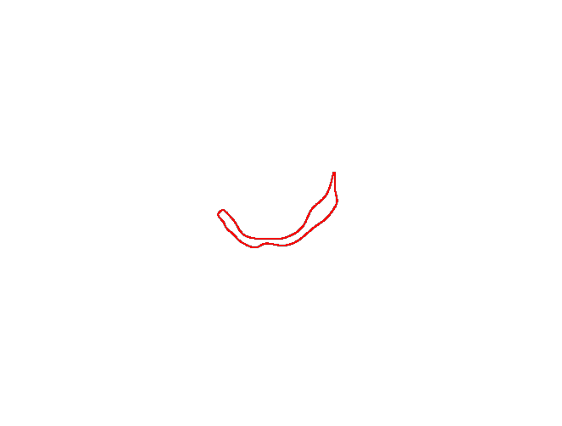

In [11]:
%matplotlib inline
gray_image152 = mpimg.imread('first_line_only.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

<h3 style="color:Navy;">2.2 определить 2-ю арку Gilula в отдельный файл + эталонное изображение с линией</h3>

In [7]:
matplotlib.use('TkAgg')  # Используйте TkAgg backend
# Специальная магическая команда для интерактивных графиков в Jupyter Notebook
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from PIL import Image, ImageDraw
import numpy as np
from scipy.interpolate import splprep, splev

image_path = '16_262_152_bw_width.png'  #  путь к  изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=1)
        fig.canvas.draw()
        
        # Когда было выбрано 6 точек, нарисовать кривую линию
        if len(points) == 31:
            line_image = draw_spline(points)
            save_combined_image(line_image)
            save_line_image(line_image)
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=0.3)  # Рисование непрозрачной линии
    fig.canvas.draw()
    
    # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("standard_and_second_line.png")
    print("Изображение сохранено как standard_and_second_line.png")

# Функция для сохранения только линии в отдельный файл
def save_line_image(line_image):
    line_image.save("second_line_only.png")
    print("Изображение линии сохранено как second_line_only.png")

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как standard_and_second_line.png
Изображение линии сохранено как second_line_only.png


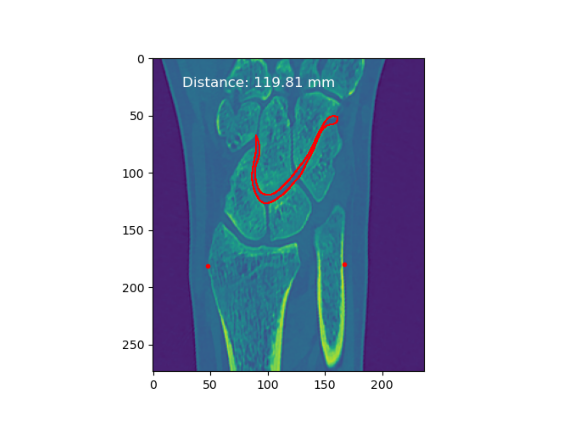

In [12]:
%matplotlib inline
gray_image152 = mpimg.imread('standard_and_second_line.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

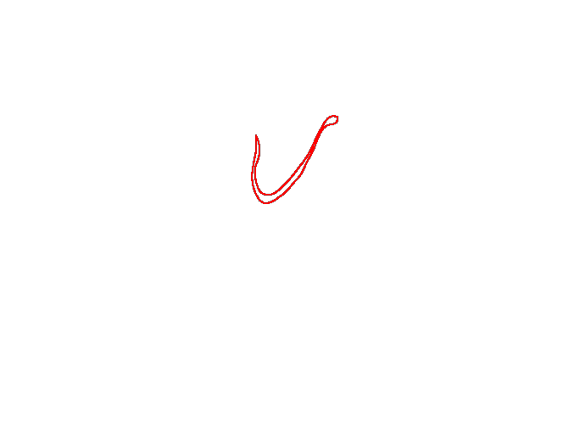

In [13]:
%matplotlib inline
gray_image152 = mpimg.imread('second_line_only.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

<h3 style="color:Navy;">2.3 Изображение патологии с приведённым  по ширине запястьем</h3>

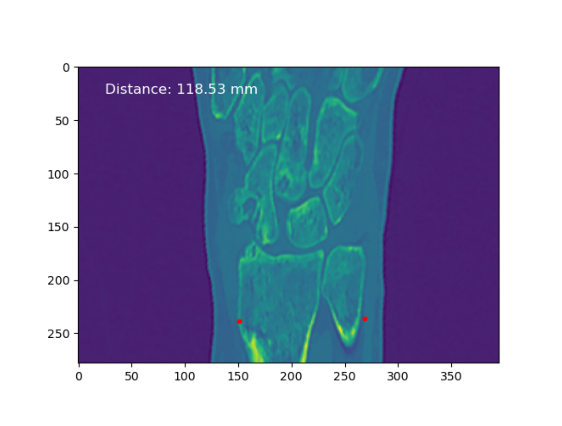

In [14]:
%matplotlib inline
gray_image152 = mpimg.imread('16_258_542_bw_resized_mark.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

<h4 style="color:red;"> ПЕРЕЗАПУСК</h4>

<h3 style="color:Navy;">2.4 Патология с наложенной эталонной первой аркой Gilula </h3>

In [4]:
%matplotlib notebook
import tkinter as tk
from PIL import Image, ImageTk, ImageOps, ImageGrab

class ImageOverlayApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Overlay")

        # Загрузка изображений
        image1_path = "first_line_only.png"
        image2_path = "16_258_542_bw_resized_mark.png"
        self.base_image = Image.open(image2_path)
        self.overlay_image = Image.open(image1_path).convert("RGBA")

        # Создание полупрозрачного наложения
        self.overlay_image.putalpha(128)  # Уровень прозрачности (0-255)

        # Конвертируем изображения для использования в tkinter
        self.base_image_tk = ImageTk.PhotoImage(self.base_image)
        self.overlay_image_tk = ImageTk.PhotoImage(self.overlay_image)

        # Создаём холст для отображения изображений
        self.canvas = tk.Canvas(root, width=self.base_image.width, height=self.base_image.height)
        self.canvas.pack()

        # Отображение основного изображения
        self.canvas.create_image(0, 0, anchor=tk.NW, image=self.base_image_tk)

        # Добавляем наложение
        self.overlay_item = self.canvas.create_image(0, 0, anchor=tk.NW, image=self.overlay_image_tk)

        # Переменные для управления перетаскиванием
        self.drag_data = {"x": 0, "y": 0, "item": None}

        # Привязка обработчиков мыши к холсту
        self.canvas.tag_bind(self.overlay_item, "<ButtonPress-1>", self.start_drag)
        self.canvas.tag_bind(self.overlay_item, "<B1-Motion>", self.drag)
        self.canvas.tag_bind(self.overlay_item, "<ButtonRelease-1>", self.stop_drag)

    def start_drag(self, event):
        self.drag_data["item"] = self.overlay_item
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def drag(self, event):
        dx = event.x - self.drag_data["x"]
        dy = event.y - self.drag_data["y"]
        self.canvas.move(self.drag_data["item"], dx, dy)
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def stop_drag(self, event):
        self.drag_data["item"] = None
        self.drag_data["x"] = 0
        self.drag_data["y"] = 0

        # Сохраняем текущее изображение в файл
        self.save_combined_image()

    def save_combined_image(self):
        # Захват содержимого холста
        x = self.canvas.winfo_rootx()
        y = self.canvas.winfo_rooty()
        width = self.canvas.winfo_width()
        height = self.canvas.winfo_height()

        # Захват области холста
        canvas_image = ImageGrab.grab((x, y, x + width, y + height))

        # Сохранение в файл
        canvas_image.save("1Gilula.png")
        print("Совмещённое изображение сохранено как 1Gilula.png")

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageOverlayApp(root)
    root.mainloop()

Совмещённое изображение сохранено как 1Gilula.png


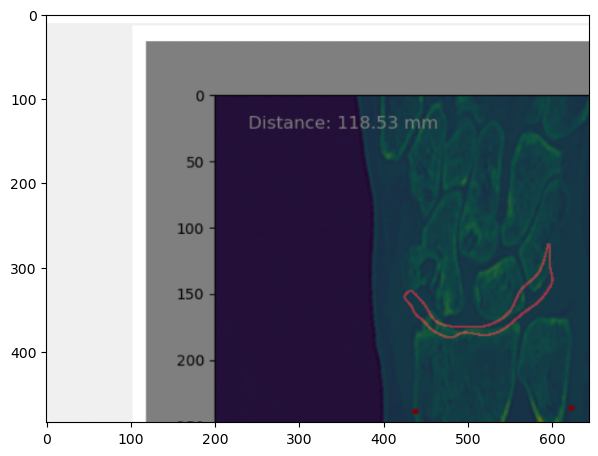

In [5]:
%matplotlib inline
gray_image542r = mpimg.imread('1Gilula.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image542r, cmap='gray')
#plt.axis('off')
plt.show()

<h3 style="color:Navy;">2.5 Патология с наложенной эталонной второй аркой Gilula </h3>

In [6]:
%matplotlib notebook
import tkinter as tk
from PIL import Image, ImageTk, ImageOps, ImageGrab

class ImageOverlayApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Overlay")

        # Загрузка изображений
        image1_path = "second_line_only.png"
        image2_path = "16_258_542_bw_resized_mark.png"
        self.base_image = Image.open(image2_path)
        self.overlay_image = Image.open(image1_path).convert("RGBA")

        # Создание полупрозрачного наложения
        self.overlay_image.putalpha(128)  # Уровень прозрачности (0-255)

        # Конвертируем изображения для использования в tkinter
        self.base_image_tk = ImageTk.PhotoImage(self.base_image)
        self.overlay_image_tk = ImageTk.PhotoImage(self.overlay_image)

        # Создаём холст для отображения изображений
        self.canvas = tk.Canvas(root, width=self.base_image.width, height=self.base_image.height)
        self.canvas.pack()

        # Отображение основного изображения
        self.canvas.create_image(0, 0, anchor=tk.NW, image=self.base_image_tk)

        # Добавляем наложение
        self.overlay_item = self.canvas.create_image(0, 0, anchor=tk.NW, image=self.overlay_image_tk)

        # Переменные для управления перетаскиванием
        self.drag_data = {"x": 0, "y": 0, "item": None}

        # Привязка обработчиков мыши к холсту
        self.canvas.tag_bind(self.overlay_item, "<ButtonPress-1>", self.start_drag)
        self.canvas.tag_bind(self.overlay_item, "<B1-Motion>", self.drag)
        self.canvas.tag_bind(self.overlay_item, "<ButtonRelease-1>", self.stop_drag)

    def start_drag(self, event):
        self.drag_data["item"] = self.overlay_item
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def drag(self, event):
        dx = event.x - self.drag_data["x"]
        dy = event.y - self.drag_data["y"]
        self.canvas.move(self.drag_data["item"], dx, dy)
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def stop_drag(self, event):
        self.drag_data["item"] = None
        self.drag_data["x"] = 0
        self.drag_data["y"] = 0

        # Сохраняем текущее изображение в файл
        self.save_combined_image()

    def save_combined_image(self):
        # Захват содержимого холста
        x = self.canvas.winfo_rootx()
        y = self.canvas.winfo_rooty()
        width = self.canvas.winfo_width()
        height = self.canvas.winfo_height()

        # Захват области холста
        canvas_image = ImageGrab.grab((x, y, x + width, y + height))

        # Сохранение в файл
        canvas_image.save("2Gilula.png")
        print("Совмещённое изображение сохранено как 2Gilula.png")

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageOverlayApp(root)
    root.mainloop()

Совмещённое изображение сохранено как 2Gilula.png


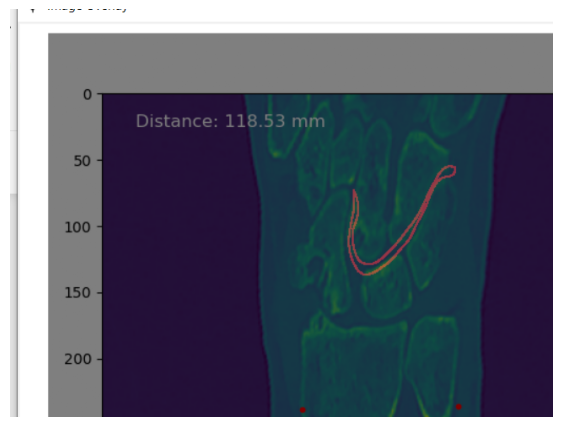

In [7]:
%matplotlib inline
gray_image152 = mpimg.imread('2Gilula.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

<h2 style="color:red;">МОНО ЛИНИЯ</h2>

<h3 style="color:Navy;">3.1 определить 1-ю арку Gilula в отдельный файл + эталонное изображение с линией</h3>

In [6]:
matplotlib.use('TkAgg')  # Используйте TkAgg backend
# Специальная магическая команда для интерактивных графиков в Jupyter Notebook
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from PIL import Image, ImageDraw
import numpy as np
from scipy.interpolate import splprep, splev

image_path = '16_262_152_bw_width.png'  #  путь к  изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=1)
        fig.canvas.draw()
        
        # Когда было выбрано 6 точек, нарисовать кривую линию
        if len(points) == 15:
            line_image = draw_spline(points)
            save_combined_image(line_image)
            save_line_image(line_image)
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=0.3)  # Рисование непрозрачной линии
    fig.canvas.draw()
    
    # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("standard_and_first_lineM.png")
    print("Изображение сохранено как standard_and_first_lineM.png")

# Функция для сохранения только линии в отдельный файл
def save_line_image(line_image):
    line_image.save("first_line_onlyM.png")
    print("Изображение линии сохранено как first_line_onlyM.png")

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как standard_and_first_lineM.png
Изображение линии сохранено как first_line_onlyM.png


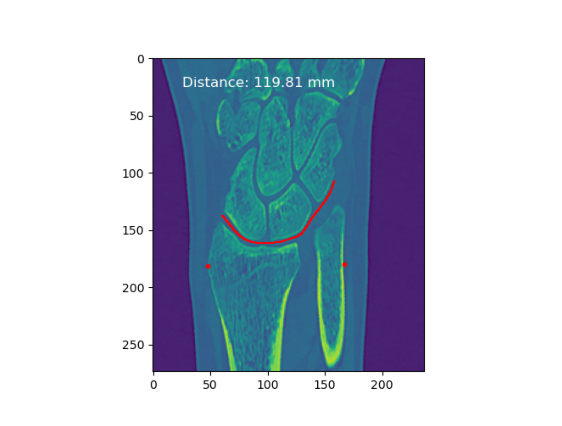

In [7]:
%matplotlib inline
gray_image152 = mpimg.imread('standard_and_first_lineM.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

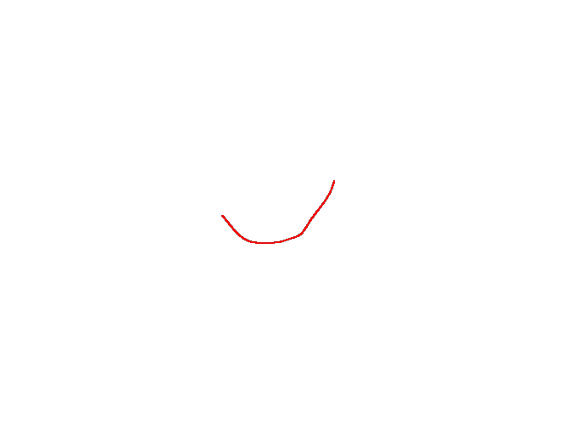

In [8]:
%matplotlib inline
gray_image152 = mpimg.imread('first_line_onlyM.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

<h3 style="color:Navy;">3.2 определить 2-ю арку Gilula в отдельный файл + эталонное изображение с линией</h3>

In [10]:
matplotlib.use('TkAgg')  # Используйте TkAgg backend
# Специальная магическая команда для интерактивных графиков в Jupyter Notebook
#%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from PIL import Image, ImageDraw
import numpy as np
from scipy.interpolate import splprep, splev

image_path = '16_262_152_bw_width.png'  #  путь к  изображению
image = Image.open(image_path).convert("RGBA")

# Конвертируем изображение в массив numpy для отображения через matplotlib
image_array = np.array(image)

# Создаем список для хранения точек
points = []

# Обработчик кликов
def onclick(event):
    global points
    if event.button == MouseButton.LEFT:
        # Добавление точки в список
        points.append([event.xdata, event.ydata])
        
        # Отображение точки на изображении
        ax.plot(event.xdata, event.ydata, 'ro', markersize=1)
        fig.canvas.draw()
        
        # Когда было выбрано 6 точек, нарисовать кривую линию
        if len(points) == 21:
            line_image = draw_spline(points)
            save_combined_image(line_image)
            save_line_image(line_image)
            fig.canvas.mpl_disconnect(cid)

# Функция для рисования кривой линии
def draw_spline(points):
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]
    
    # Используем сплайны для плавной линии через контрольные точки
    tck, u = splprep([x, y], s=0)
    u_new = np.linspace(u.min(), u.max(), 1000)
    x_new, y_new = splev(u_new, tck, ext=0)
    
    ax.plot(x_new, y_new, 'r-', lw=0.3)  # Рисование непрозрачной линии
    fig.canvas.draw()
    
    # Создаем пустое изображение для линии
    line_image = Image.new("RGBA", image.size, (0, 0, 0, 0))
    draw = ImageDraw.Draw(line_image)
    line_points = list(zip(x_new, y_new))
    draw.line(line_points, fill=(255, 0, 0, 255), width=2)
    
    return line_image

# Функция для сохранения изображения с нанесённой линией
def save_combined_image(line_image):
    # Копируем исходное изображение
    combined_image = image.copy()
    combined_image = Image.alpha_composite(combined_image, line_image)
    combined_image.save("standard_and_second_lineM.png")
    print("Изображение сохранено как standard_and_second_lineM.png")

# Функция для сохранения только линии в отдельный файл
def save_line_image(line_image):
    line_image.save("second_line_onlyM.png")
    print("Изображение линии сохранено как second_line_onlyM.png")

# Создание фигуры и отображение изображения
fig, ax = plt.subplots()
ax.imshow(image_array)

# Привязка обработчика кликов
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Изображение сохранено как standard_and_second_lineM.png
Изображение линии сохранено как second_line_onlyM.png


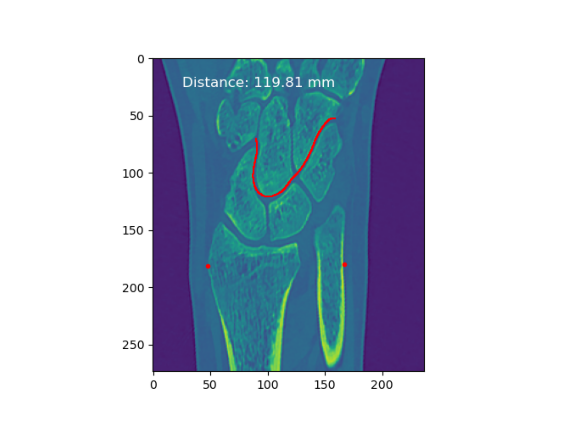

In [12]:
%matplotlib inline
gray_image152 = mpimg.imread('standard_and_second_lineM.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

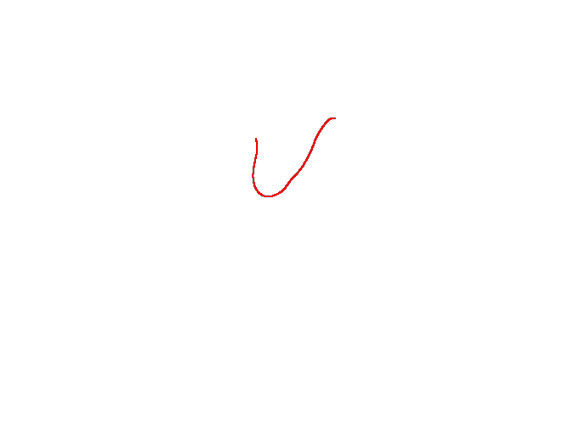

In [13]:
%matplotlib inline
gray_image152 = mpimg.imread('second_line_onlyM.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()

<h4 style="color:red;"> ПЕРЕЗАПУСК</h4>

<h3 style="color:Navy;">3.3 Патология с первой аркой Gilula </h3>

In [5]:
%matplotlib notebook
import tkinter as tk
from PIL import Image, ImageTk, ImageOps, ImageGrab

class ImageOverlayApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Overlay")

        # Загрузка изображений
        image1_path = "first_line_onlyM.png"
        image2_path = "16_258_542_bw_resized_mark.png"
        self.base_image = Image.open(image2_path)
        self.overlay_image = Image.open(image1_path).convert("RGBA")

        # Создание полупрозрачного наложения
        self.overlay_image.putalpha(128)  # Уровень прозрачности (0-255)

        # Конвертируем изображения для использования в tkinter
        self.base_image_tk = ImageTk.PhotoImage(self.base_image)
        self.overlay_image_tk = ImageTk.PhotoImage(self.overlay_image)

        # Создаём холст для отображения изображений
        self.canvas = tk.Canvas(root, width=self.base_image.width, height=self.base_image.height)
        self.canvas.pack()

        # Отображение основного изображения
        self.canvas.create_image(0, 0, anchor=tk.NW, image=self.base_image_tk)

        # Добавляем наложение
        self.overlay_item = self.canvas.create_image(0, 0, anchor=tk.NW, image=self.overlay_image_tk)

        # Переменные для управления перетаскиванием
        self.drag_data = {"x": 0, "y": 0, "item": None}

        # Привязка обработчиков мыши к холсту
        self.canvas.tag_bind(self.overlay_item, "<ButtonPress-1>", self.start_drag)
        self.canvas.tag_bind(self.overlay_item, "<B1-Motion>", self.drag)
        self.canvas.tag_bind(self.overlay_item, "<ButtonRelease-1>", self.stop_drag)

    def start_drag(self, event):
        self.drag_data["item"] = self.overlay_item
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def drag(self, event):
        dx = event.x - self.drag_data["x"]
        dy = event.y - self.drag_data["y"]
        self.canvas.move(self.drag_data["item"], dx, dy)
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def stop_drag(self, event):
        self.drag_data["item"] = None
        self.drag_data["x"] = 0
        self.drag_data["y"] = 0

        # Сохраняем текущее изображение в файл
        self.save_combined_image()

    def save_combined_image(self):
        # Захват содержимого холста
        x = self.canvas.winfo_rootx()
        y = self.canvas.winfo_rooty()
        width = self.canvas.winfo_width()
        height = self.canvas.winfo_height()

        # Захват области холста
        canvas_image = ImageGrab.grab((x, y, x + width, y + height))

        # Сохранение в файл
        canvas_image.save("1GilulaM.png")
        print("Совмещённое изображение сохранено как 1Gilula.png")

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageOverlayApp(root)
    root.mainloop()

Совмещённое изображение сохранено как 1Gilula.png


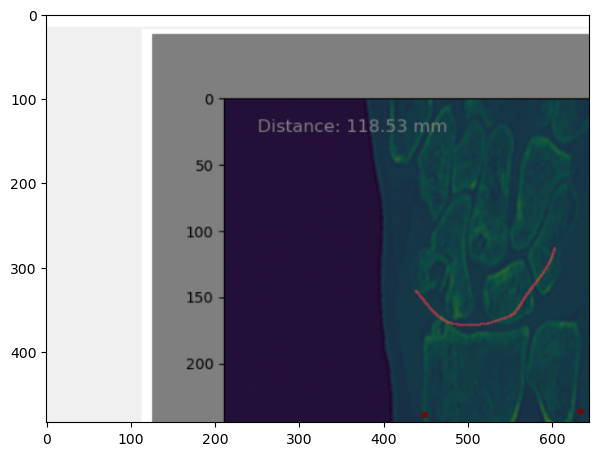

In [9]:
%matplotlib inline
gray_image542r = mpimg.imread('1GilulaM.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image542r, cmap='gray')
#plt.axis('off')
plt.show()

<h3 style="color:Navy;">3.3 Патология со второй аркой Gilula </h3>

In [7]:
%matplotlib notebook
import tkinter as tk
from PIL import Image, ImageTk, ImageOps, ImageGrab

class ImageOverlayApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Image Overlay")

        # Загрузка изображений
        image1_path = "second_line_onlyM.png"
        image2_path = "16_258_542_bw_resized_mark.png"
        self.base_image = Image.open(image2_path)
        self.overlay_image = Image.open(image1_path).convert("RGBA")

        # Создание полупрозрачного наложения
        self.overlay_image.putalpha(128)  # Уровень прозрачности (0-255)

        # Конвертируем изображения для использования в tkinter
        self.base_image_tk = ImageTk.PhotoImage(self.base_image)
        self.overlay_image_tk = ImageTk.PhotoImage(self.overlay_image)

        # Создаём холст для отображения изображений
        self.canvas = tk.Canvas(root, width=self.base_image.width, height=self.base_image.height)
        self.canvas.pack()

        # Отображение основного изображения
        self.canvas.create_image(0, 0, anchor=tk.NW, image=self.base_image_tk)

        # Добавляем наложение
        self.overlay_item = self.canvas.create_image(0, 0, anchor=tk.NW, image=self.overlay_image_tk)

        # Переменные для управления перетаскиванием
        self.drag_data = {"x": 0, "y": 0, "item": None}

        # Привязка обработчиков мыши к холсту
        self.canvas.tag_bind(self.overlay_item, "<ButtonPress-1>", self.start_drag)
        self.canvas.tag_bind(self.overlay_item, "<B1-Motion>", self.drag)
        self.canvas.tag_bind(self.overlay_item, "<ButtonRelease-1>", self.stop_drag)

    def start_drag(self, event):
        self.drag_data["item"] = self.overlay_item
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def drag(self, event):
        dx = event.x - self.drag_data["x"]
        dy = event.y - self.drag_data["y"]
        self.canvas.move(self.drag_data["item"], dx, dy)
        self.drag_data["x"] = event.x
        self.drag_data["y"] = event.y

    def stop_drag(self, event):
        self.drag_data["item"] = None
        self.drag_data["x"] = 0
        self.drag_data["y"] = 0

        # Сохраняем текущее изображение в файл
        self.save_combined_image()

    def save_combined_image(self):
        # Захват содержимого холста
        x = self.canvas.winfo_rootx()
        y = self.canvas.winfo_rooty()
        width = self.canvas.winfo_width()
        height = self.canvas.winfo_height()

        # Захват области холста
        canvas_image = ImageGrab.grab((x, y, x + width, y + height))

        # Сохранение в файл
        canvas_image.save("2GilulaM.png")
        print("Совмещённое изображение сохранено как 2Gilula.png")

if __name__ == "__main__":
    root = tk.Tk()
    app = ImageOverlayApp(root)
    root.mainloop()

Совмещённое изображение сохранено как 2Gilula.png


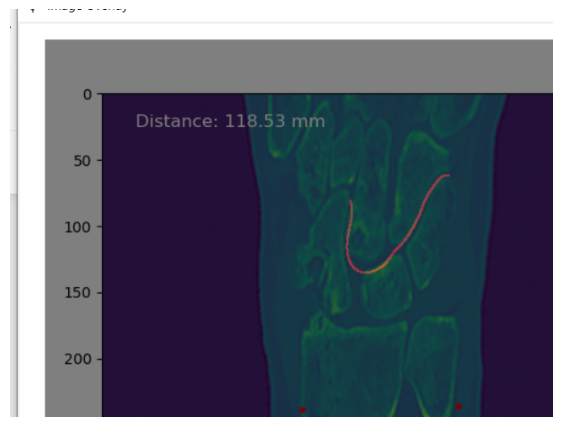

In [8]:
%matplotlib inline
gray_image152 = mpimg.imread('2GilulaM.png')
plt.figure(figsize=(7, 7)) # Отображение изображения в оттенках серого
plt.imshow(gray_image152, cmap='gray')
plt.axis('off')
plt.show()